In [2]:
# Import necessary libraries
from src.para_voro import *
from src.para_voro_plots import *


def gen_data(dim: int = 3, num_samples: int = 200):
    # Generate sample data for two intersecting clusters
    cluster1 = np.random.randn(num_samples, dim)
    cluster2 = np.random.randn(num_samples, dim)

    cluster1 = cluster1 + np.random.randint(2, size=dim) - 1
    cluster2 = cluster2 + np.random.randint(2, size=dim) - 1
    samples = np.vstack([cluster1, cluster2])

    # Add labels for the two clusters
    labels = np.array([0] * num_samples + [1] * num_samples)

    return samples, labels

In [3]:
np.random.seed(0)
dim = 3
samples, labels = gen_data(dim=dim, num_samples=100)

aabbox = np.array([
    [-3.0, 3.0],
    [-3.0, 3.0],
    [-3.0, 3.0],
    [-3.0, 3.0],
    [-3.0, 3.0],
    [-3.0, 3.0],
    [-3.0, 3.0]
])[:dim]
bw = 0.5
bandwidths = np.array([
    bw, bw, bw, bw, bw, bw, bw, bw
])[:dim]

plot data


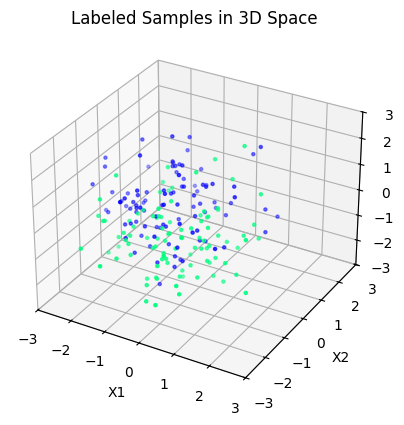

In [4]:
print("plot data")
if dim <= 3:
    ax = plot_data(samples, labels, clip_box=aabbox)

compute ridge vertices


c:\Users\bauerrn\Projekte\VoroParaSense\src\para_voro.py:211: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  d_ = point @ eq[:-1] + eq[-1]
c:\Users\bauerrn\Projekte\VoroParaSense\src\para_voro.py:305: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'C', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  d = np.dot(points[i], ridge_halfspace_definition[:-1]) + ridge_halfspace_definition[-1]


plot relevant ridges
[[-3. -3. -3.]
 [-3.  3. -3.]
 [ 3.  3. -3.]
 [ 3. -3. -3.]]


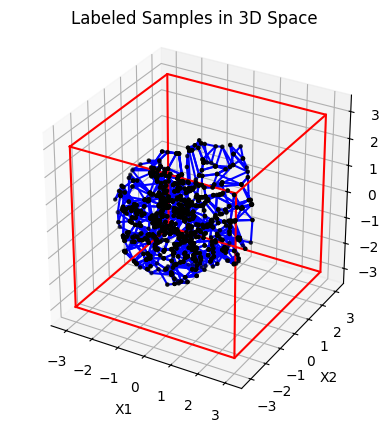

In [5]:
print("compute ridge vertices")
assert len(bandwidths) == len(aabbox) == dim
cch = True

ridge_vertices = generate_geometric_segment_boundaries_via_voronoi(samples=samples, labels=labels, clip_bbox=aabbox, clip_convex_hull=cch, verbose=False)
# ridge_vertices = make_object_array([np.array([[0.25, 0.0], [0.25, 0.5]]),
#                                     np.array([[0.0, 0.25], [0.5, 0.25]])], dtype=object)
print("plot relevant ridges")
if dim <= 3:
    plot_ridges(ridge_vertices, samples=samples, labels=labels, clip_box=aabbox, clip_convex_hull=cch)

In [6]:
# cch = True
# ridge_vertices = np.load("tmp_ridge_vertices.npy", allow_pickle=True)

compute sample points and sensitivities


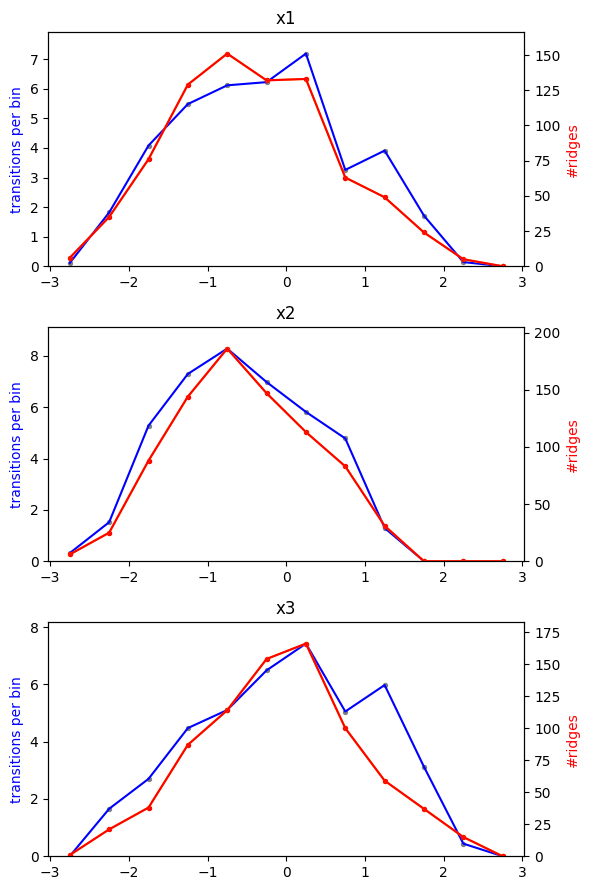

In [7]:
print("compute sample points and sensitivities")
sample_points, sensitivities, n_ridges = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, step_size=bandwidths, clip_box=aabbox, return_n_ridges=True, verbose=False)
plot_sensitivities(sample_points, sensitivities, n_ridges=n_ridges)